# **Problem Statement**

**Create ML model to predict the Lead Category (High Potential , Low
Potential)**

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

* Connecting colab to database

In [2]:
!pip install mysql-connector-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.6/31.6 MB 44.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.8/409.8 kB 47.9 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.14.0 requires protobuf<4.21,>=3.20.3, but you have protobuf 4.21.12 which is incompatible.


In [3]:
!apt-get -y install mysql-server

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libcgi-fast-perl libcgi-pm-perl libclone-perl libencode-locale-perl libfcgi-bin libfcgi-perl
  libfcgi0ldbl libhtml-parser-perl libhtml-tagset-perl libhtml-template-perl libhttp-date-perl
  libhttp-message-perl libio-html-perl liblwp-mediatypes-perl libmecab2 libprotobuf-lite23
  liburi-perl mecab-ipadic mecab-ipadic-utf8 mecab-utils mysql-client-8.0 mysql-client-core-8.0
  mysql-server-8.0 mysql-server-core-8.0
Suggested packages:
  libdata-dump-perl libipc-sharedcache-perl libbusiness-isbn-perl libwww-perl mailx tinyca
The following NEW packages will be installed:
  libcgi-fast-perl libcgi-pm-perl libclone-perl libencode-locale-perl libfcgi-bin libfcgi-perl
  libfcgi0ldbl libhtml-parser-perl libhtml-tagset-perl libhtml-template-perl libhttp-date-perl
  libhttp-message-perl libio-html-perl liblwp-mediatypes-perl libmecab2 libprotobuf-l

In [4]:
!service mysql start

 * Starting MySQL database server mysqld
su: warning: cannot change directory to /nonexistent: No such file or directory
   ...done.


In [5]:
import mysql.connector

In [6]:
# Fetching data from database

In [7]:
connection = mysql.connector.connect(host ='18.136.157.135',
                                    user ='dm_team2',
                                    password ='DM!$Team&27@9!20!',
                                    database ='project_sales')

In [8]:
query = "select * from data"
data = pd.read_sql(query,connection)

**Basic checks**

In [9]:
data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open


In [10]:
data.tail()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
7417,28-04-2018 09:45,9,Call,,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15,Call,,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5,Live Chat-Direct,,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21,CRM form,,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry
7421,28-04-2018 07:54,25,Website,,cXXXXXXX@gmail.com,Sales-Agent-3,Chennai,Mode-1,CONVERTED


In [11]:
data.shape

(7422, 9)

In [12]:
data.columns

Index(['Created', 'Product_ID', 'Source', 'Mobile', 'EMAIL', 'Sales_Agent',
       'Location', 'Delivery_Mode', 'Status'],
      dtype='object')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Created        7422 non-null   object
 1   Product_ID     7422 non-null   object
 2   Source         7422 non-null   object
 3   Mobile         7422 non-null   object
 4   EMAIL          7422 non-null   object
 5   Sales_Agent    7422 non-null   object
 6   Location       7422 non-null   object
 7   Delivery_Mode  7422 non-null   object
 8   Status         7422 non-null   object
dtypes: object(9)
memory usage: 522.0+ KB


In [14]:
data.describe()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
count,7422,7422,7422,7422,7422,7422,7422,7422,7422
unique,6752,30,26,487,883,13,18,5,11
top,26-09-2018 11:30,18,Call,,#VALUE!,Sales-Agent-4,Other Locations,Mode-5,Junk Lead
freq,4,1711,2547,1810,1701,1500,2500,2975,1536


In [15]:
data.duplicated().sum()

2

In [16]:
data.loc[data.duplicated()]

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
130,10-11-2018 20:27,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
135,10-11-2018 20:17,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open


In [17]:
cols=data.drop('Created',axis=1)

In [18]:
cols.columns

Index(['Product_ID', 'Source', 'Mobile', 'EMAIL', 'Sales_Agent', 'Location',
       'Delivery_Mode', 'Status'],
      dtype='object')

In [19]:
for i in cols:
  print("column name:",i)
  print("=================")
  print(cols[i].value_counts())
  print('********************************')
  print("  ")

column name: Product_ID
18    1711
15    1518
19    1189
9      992
27     739
5      487
10     168
1      105
20     102
25      90
21      66
        58
2       38
12      36
26      31
14      27
11      12
22       8
3        7
17       7
6        7
8        6
13       5
24       3
16       3
23       2
0        2
28       1
7        1
4        1
Name: Product_ID, dtype: int64
********************************
  
column name: Source
Call                             2547
Live Chat-Direct                 1834
Website                          1594
Live Chat-Google Organic          274
Live Chat -PPC                    249
Live Chat-Blog                    237
Customer Referral                 180
US Website                        137
Just Dial                          56
Existing Client                    51
Personal Contact                   50
Live Chat-CPC                      50
By Recommendation                  32
CRM form                           23
Existing Customer          

 **Domain Analysis**

* **Sales effectiveness**  describes the process of finding the right sales tasks to produce the best possible sales output and outcomes. For different organizations, this could mean improved profit, revenue, sales of a new product, or something else entirely — it all depends on how company strategy defines success.
* **Salesforce effectiveness**:sales force effectiveness is the ability of the sales team of an organization to get a “win” at every stage of the customer journey and improve the revenue as well as the bottom line of the organization.Sales force effectiveness in business measures how good your sales team is working to achieve those targets. This measurement is not just limited to teams and is extended towards individual contributors as well since their performance reflects the performance of the entire team.

For improving sales force effectiveness it requires collaboration between the sales and marketing teams so that they can work together and find out what's working and what's not. Continuously improving the strategies, messages, knowledge, and skills the salespeople are using is the only way to keep getting opportunities.




**Data summary using basic checks**
* Its a Supervised learning problem
* Our target column is status;In target column it contains 11 labels and we have to classify them into low potential or high potential.
* We can see blank spaces in the data set.And have to handle these problem while preprocessing.
* Duplicates should be  removed
* special characters are there in the columns;And also mobile number and email id is not requried while modeling so we can drop these two columns
* No scaling required as well as outlier handling
* Label encoding techniques should apply here to handle categorical features

# **EDA and Data analysis**

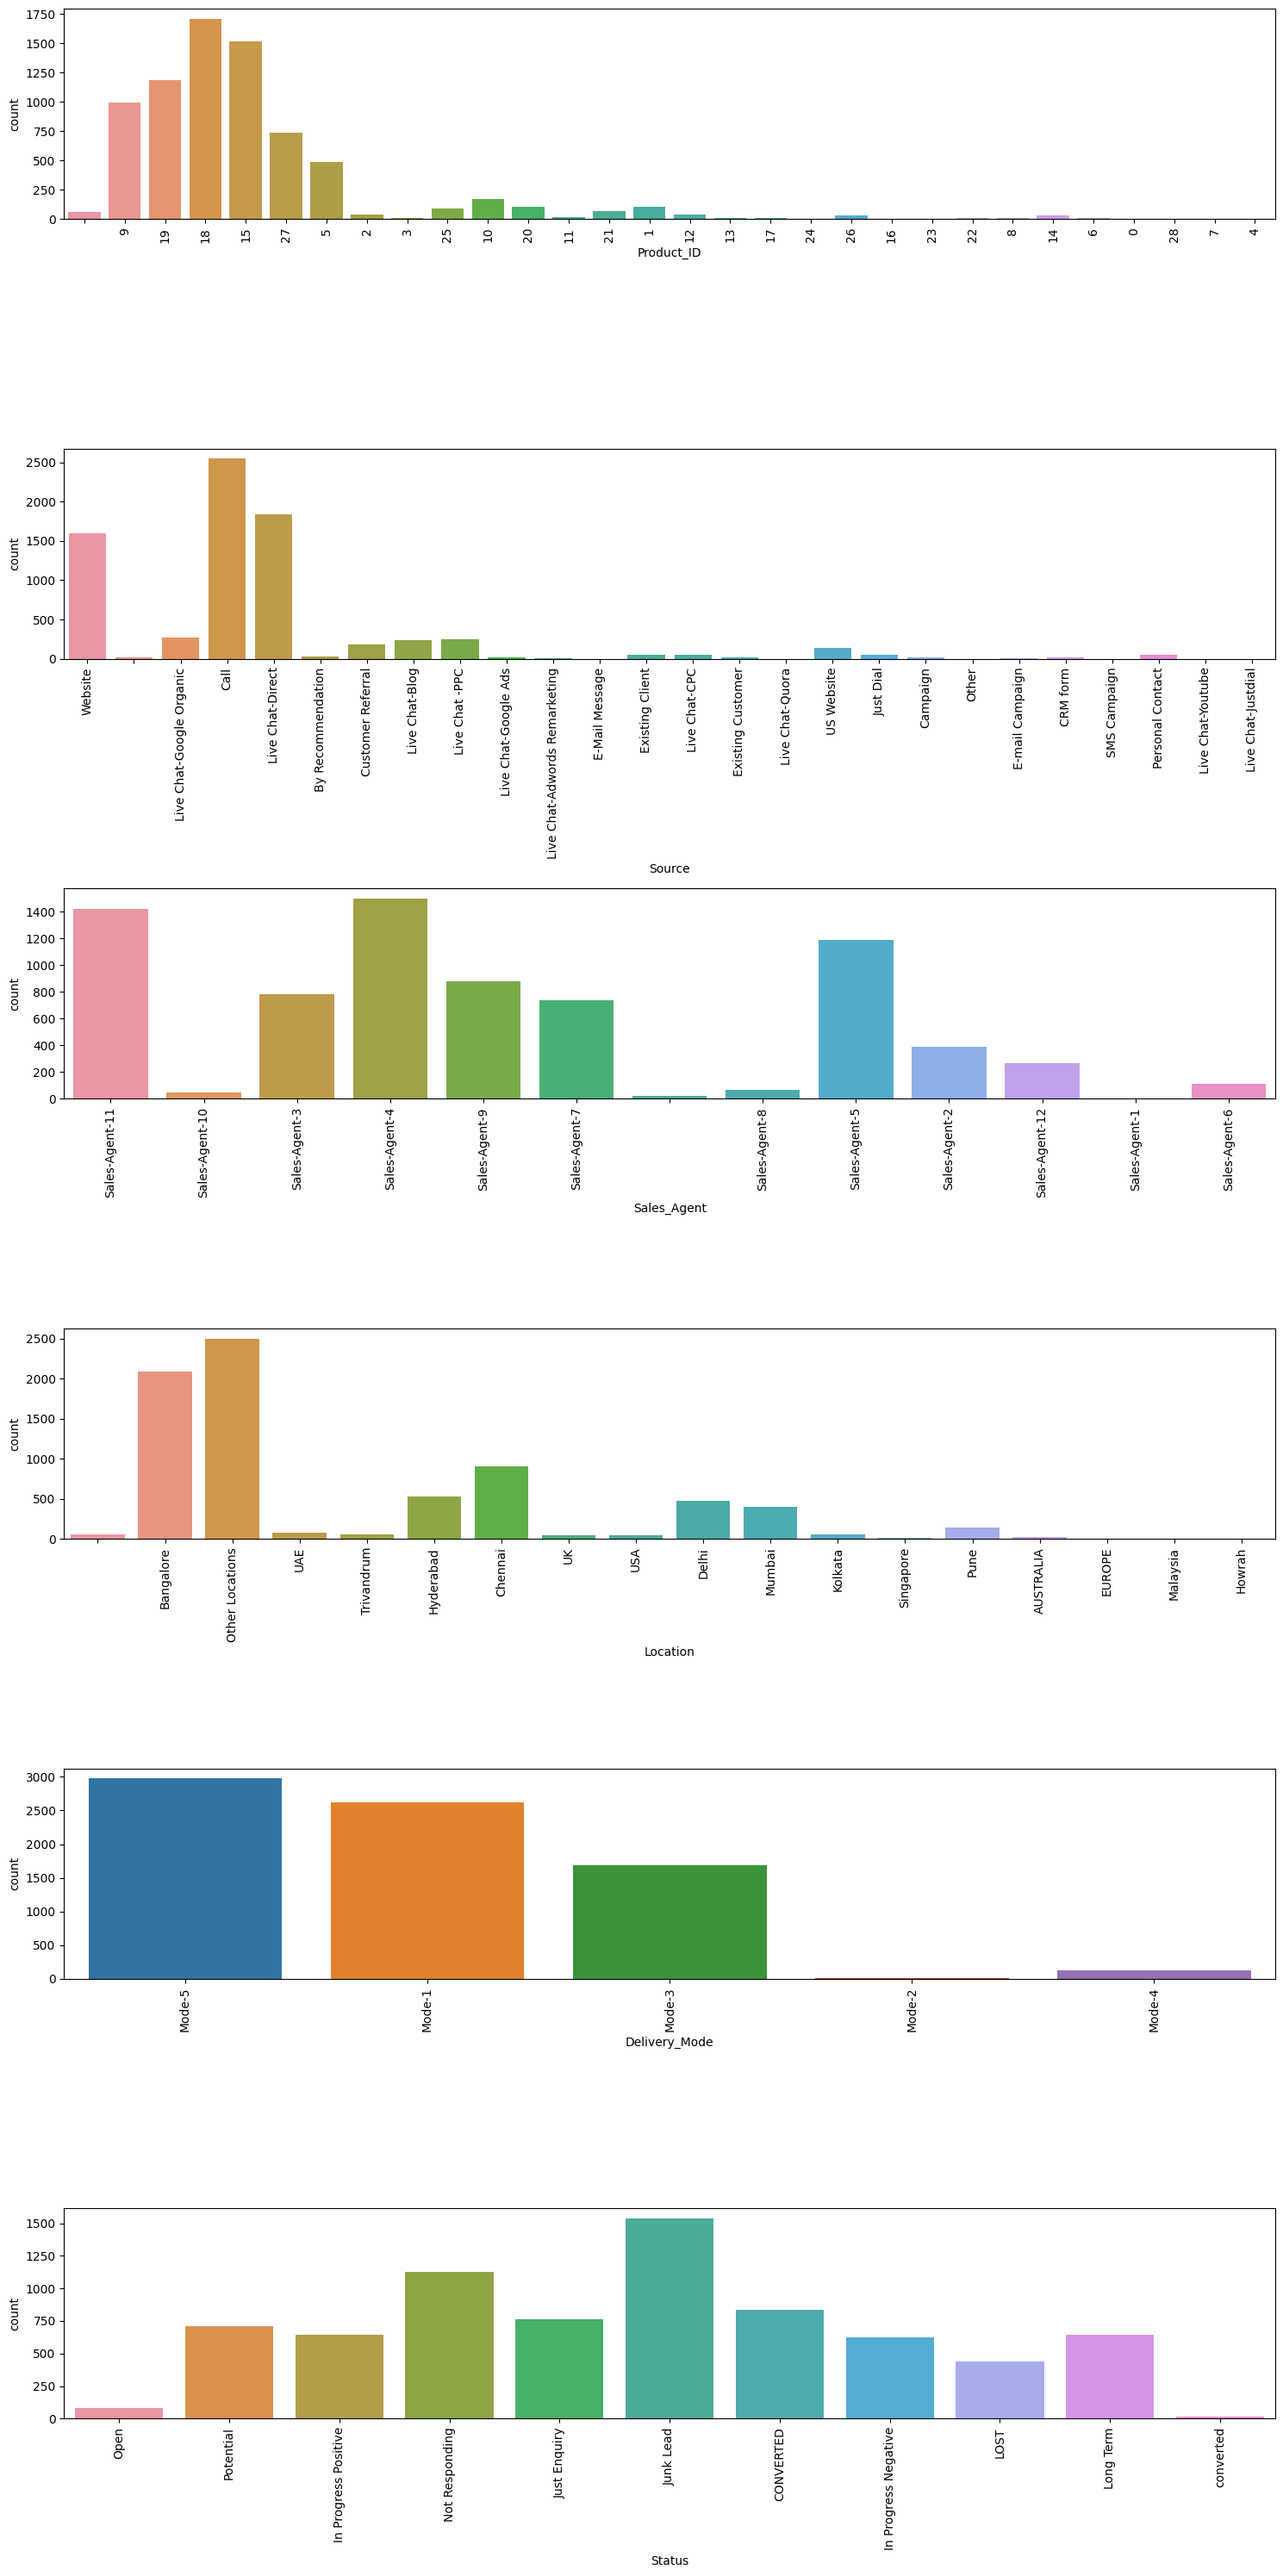

In [20]:
cols=data[['Product_ID','Source','Sales_Agent','Location','Delivery_Mode','Status' ]]
plt.figure(figsize=(15,30))
plt_num = 1
for i in cols:
  if plt_num <= 6:
        plt.subplot(6,1,plt_num)
        sns.countplot(x=i ,data=data)
        plt.xlabel(i,fontsize=10)
        plt.xticks(rotation=90)

  plt_num += 1
plt.tight_layout()
plt.show()

*  Product ID  18,15,19,27,9 and 5 are more sold products.Remaining all product ID are less sold products.
* Most of the sales are done through call, live chat direct and website source.
* Most of the sales is done by sales agent 4,sales agent and sales agent 5.
Sales agent 3,9,7 has near to 800 to 850 sales.
* Total 17 location of sales with including foreign and india.Banglore and other location has more sales than other locations.And Chennai has near to 1000 sales
* In Status, the junk lead are more.
Not responding status customer has less than 1200.
By visual analyzing low potential customer are more and high potential cutomer are less.

* **All about highest sold product_id 18**

In [21]:
s=data.loc[data['Product_ID'].str.contains("18")]

In [22]:
s.shape

(1711, 9)

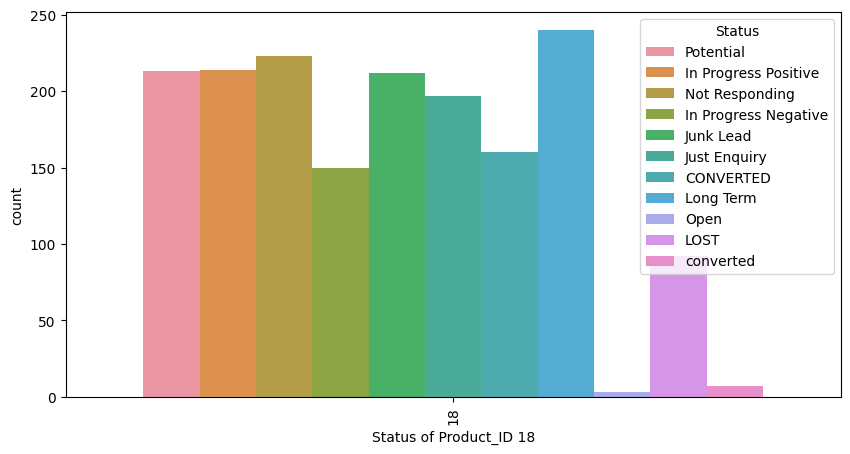

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(x=s['Product_ID'] ,data=s,hue='Status')
plt.xlabel("Status of Product_ID 18",fontsize=10)
plt.xticks(rotation=90)
plt.show()

Inference: product status is mixed so we cant tell the quality/potential of the product by how much its sold.

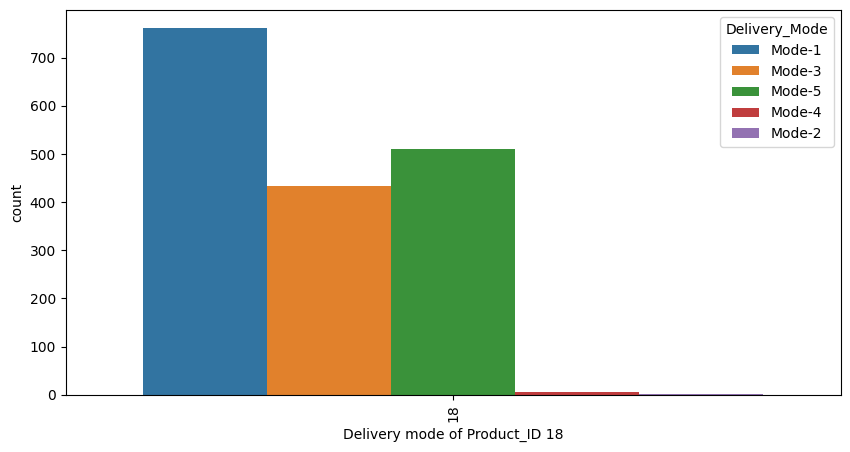

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(x=s['Product_ID'] ,data=s,hue='Delivery_Mode')
plt.xlabel("Delivery mode of Product_ID 18",fontsize=10)
plt.xticks(rotation=90)
plt.show()

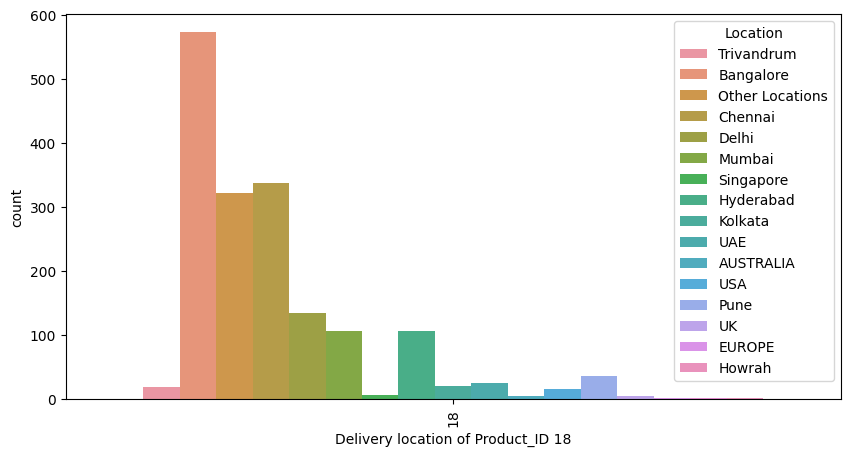

In [25]:
plt.figure(figsize=(10,5))
sns.countplot(x=s['Product_ID'] ,data=s,hue='Location')
plt.xlabel("Delivery location of Product_ID 18",fontsize=10)
plt.xticks(rotation=90)
plt.show()

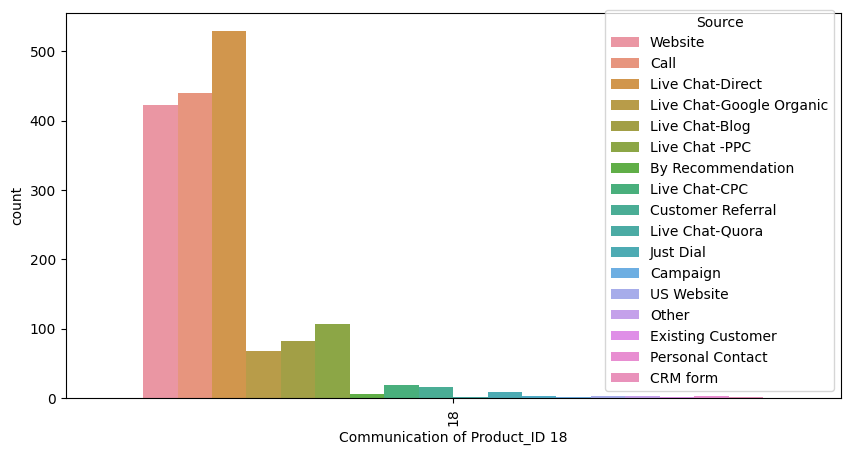

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(x=s['Product_ID'] ,data=s,hue='Source')
plt.xlabel("Communication of Product_ID 18",fontsize=10)
plt.xticks(rotation=90)
plt.show()

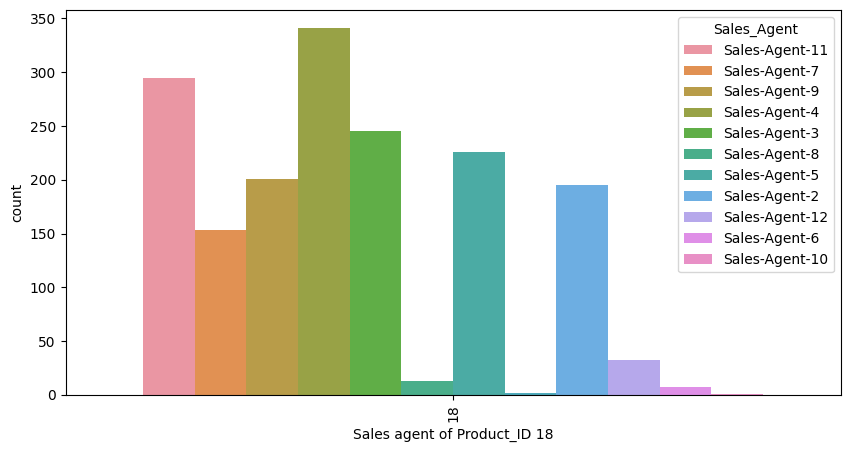

In [27]:
plt.figure(figsize=(10,5))
sns.countplot(x=s['Product_ID'] ,data=s,hue='Sales_Agent')
plt.xlabel("Sales agent of Product_ID 18",fontsize=10)
plt.xticks(rotation=90)
plt.show()

* product_18 is mostly sold in Bangalore.
* Most sales are done through Direct-Livechat,call, website.
* And the modes of deliveries are 1,5,3.

# **Data Preprocessing**

In [28]:
data.drop_duplicates(inplace=True)#droping duplicates

In [29]:
data.shape

(7420, 9)

* **Handling missing values**

In [30]:
# Replace blank spaces with nan
data.replace('',np.nan,inplace=True)
data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,NaN,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,NaN,Mode-5,Open
1,14-11-2018 09:22,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,Open
2,14-11-2018 09:21,NaN,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,NaN,Mode-5,Open
3,14-11-2018 08:46,NaN,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
4,14-11-2018 07:34,NaN,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open


In [31]:
data.isnull().sum()

Created             0
Product_ID         56
Source             17
Mobile           1810
EMAIL               0
Sales_Agent        23
Location           56
Delivery_Mode       0
Status              0
dtype: int64

* In this data set 5 feature contain missing value with including unique feature.
* Not handling unique feature missing value
* Remaining feature missing value impute with mode.Since the features are categorical


In [32]:
#--> Product_ID
data.Product_ID.mode()

0    18
Name: Product_ID, dtype: object

In [33]:
data.loc[data['Product_ID'].isnull()==True,'Product_ID']=18

In [34]:
#---> Source
data.Source.mode()

0    Call
Name: Source, dtype: object

In [35]:
data.loc[data['Source'].isnull()==True,'Source']="Call"

In [36]:
#--> Sales_Agent
data.Sales_Agent.mode()

0    Sales-Agent-4
Name: Sales_Agent, dtype: object

In [37]:
data.loc[data['Sales_Agent'].isnull()==True,'Sales_Agent']='Sales-Agent-4'

In [38]:
#--> Location
data.Location.mode()

0    Other Locations
Name: Location, dtype: object

In [39]:
data.loc[data['Location'].isnull()==True,'Location']='Other Locations'

In [40]:
data.isnull().sum()

Created             0
Product_ID          0
Source              0
Mobile           1810
EMAIL               0
Sales_Agent         0
Location            0
Delivery_Mode       0
Status              0
dtype: int64

* **Features which contains lots of differnt labels are handling by replacing or merging**

-->Source

In [41]:
print(data['Source'].value_counts())


Call                             2564
Live Chat-Direct                 1834
Website                          1592
Live Chat-Google Organic          274
Live Chat -PPC                    249
Live Chat-Blog                    237
Customer Referral                 180
US Website                        137
Just Dial                          56
Existing Client                    51
Personal Contact                   50
Live Chat-CPC                      50
By Recommendation                  32
CRM form                           23
Existing Customer                  22
Live Chat-Google Ads               21
Campaign                           19
E-mail Campaign                    12
Live Chat-Adwords Remarketing       7
Live Chat-Quora                     2
Other                               2
SMS Campaign                        2
Live Chat-Youtube                   2
E-Mail Message                      1
Live Chat-Justdial                  1
Name: Source, dtype: int64


Here we will change the  similar labels into new one

In [42]:
data.Source.replace(['Live Chat-Direct','Live Chat-Google Organic','Live Chat -PPC','Live Chat-Blog','Live Chat-CPC','Live Chat-Google Ads',
'Live Chat-Adwords Remarketing','Live Chat-Quora','Live Chat-Youtube','Live Chat-Justdial'],'Live_chat',inplace=True)

In [43]:
data.Source.replace(['Existing Client','Personal Contact','CRM form','Existing Customer'],'Existing_Client',inplace=True)


In [44]:
data.Source.replace(['US Website','Just Dial','Website','E-Mail Message'],'Social',inplace=True)


In [45]:
data.Source.replace(['Customer Referral','By Recommendation'],'Recommendation',inplace=True)


In [46]:
data.Source.replace(['E-mail Campaign','SMS Campaign'],'Campaign',inplace=True)


In [47]:
print(data['Source'].value_counts())


Live_chat          2677
Call               2564
Social             1786
Recommendation      212
Existing_Client     146
Campaign             33
Other                 2
Name: Source, dtype: int64


--> Status

In [48]:
print(data['Status'].value_counts())


Junk Lead               1536
Not Responding          1129
CONVERTED                834
Just Enquiry             760
Potential                708
Long Term                646
In Progress Positive     643
In Progress Negative     626
LOST                     440
Open                      80
converted                 18
Name: Status, dtype: int64


Converting them to low or high potential

In [49]:
data.Status.replace(['Junk Lead','Not Responding','In Progress Negative','Just Enquiry','LOST'],'Low_potential',inplace=True)
data.Status.replace(['CONVERTED','Potential','Long Term','In Progress Positive','Open','converted'],'High_potential',inplace=True)


In [50]:
print(data['Status'].value_counts())


Low_potential     4491
High_potential    2929
Name: Status, dtype: int64


* **Converting Categorical columns**

--> **Label Encoding**

Using label encoder to convert target column

In [51]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
data.Status=lc.fit_transform(data.Status)

In [68]:
print(data['Status'].value_counts())


1    4491
0    2929
Name: Status, dtype: int64


low potntial-0;high potential-1

In [53]:
data.columns

Index(['Created', 'Product_ID', 'Source', 'Mobile', 'EMAIL', 'Sales_Agent',
       'Location', 'Delivery_Mode', 'Status'],
      dtype='object')

In [54]:
print(data['Sales_Agent'].value_counts())


Sales-Agent-4     1523
Sales-Agent-11    1420
Sales-Agent-5     1190
Sales-Agent-9      879
Sales-Agent-3      781
Sales-Agent-7      736
Sales-Agent-2      389
Sales-Agent-12     269
Sales-Agent-6      114
Sales-Agent-8       68
Sales-Agent-10      47
Sales-Agent-1        4
Name: Sales_Agent, dtype: int64


--> **Frequency Encoding**

* converting other categorical columns using frequency encoding

In [55]:

Fre_en = {"Source": {"Live_chat":6 , "Call":5 ,'Social':4,'Recommendation':3,'Existing_Client':2,'Campaign':1,"Other":0},
          'Sales_Agent':{'Sales-Agent-1':0, 'Sales-Agent-10':1, 'Sales-Agent-8':2,'Sales-Agent-6':3,'Sales-Agent-12':4,'Sales-Agent-2':5,'Sales-Agent-7':6,
                         'Sales-Agent-3':7,'Sales-Agent-9':8,'Sales-Agent-5':9,'Sales-Agent-11':10,'Sales-Agent-4':11},
           'Location':{'Howrah':0,'EUROPE':1,"Malaysia":2,'Singapore':3,"AUSTRALIA":4,'UK':5,"USA":6,'Kolkata':7,"Trivandrum":8,'UAE':9,'Pune':10,
                       'Mumbai':11,"Delhi":12,'Hyderabad':13,"Chennai":14,'Bangalore':15,"Other Locations":16},
           'Delivery_Mode':{"Mode-5":4,'Mode-1':3,'Mode-3':2,'Mode-4':1,'Mode-2':0}

          }




data = data.replace(Fre_en)
data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,18,4,984XXXXXXX,aXXXXXXX@gmail.com,10,16,4,0
1,14-11-2018 09:22,18,4,XXXXXXX,#VALUE!,1,16,4,0
2,14-11-2018 09:21,18,4,XXXXXXX,dXXXXXXX@yahoo.com,1,16,4,0
3,14-11-2018 08:46,18,4,XXXXXXX,wXXXXXXX@gmail.com,1,16,4,0
4,14-11-2018 07:34,18,4,XXXXXXX,cXXXXXXX@gmail.com,1,16,4,0


* Droping columns 'Created','Mobile','EMAIL' beacuse they are unique columns

In [56]:
data.drop(['Created','Mobile','EMAIL'],axis=1,inplace=True)

* **Changing object data into int**

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7420 entries, 0 to 7421
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product_ID     7420 non-null   object
 1   Source         7420 non-null   int64 
 2   Sales_Agent    7420 non-null   int64 
 3   Location       7420 non-null   int64 
 4   Delivery_Mode  7420 non-null   int64 
 5   Status         7420 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 405.8+ KB


In [58]:
data=data.astype({'Product_ID': 'int64'})

In [59]:
data['Product_ID'].dtype

dtype('int64')

In [61]:
data.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,18,4,10,16,4,0
1,18,4,1,16,4,0
2,18,4,1,16,4,0
3,18,4,1,16,4,0
4,18,4,1,16,4,0


In [60]:
data.corr()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
Product_ID,1.000000,-0.011623,0.012480,-0.029509,-0.023365,-0.085964
Source,-0.011623,1.000000,0.026880,-0.151310,-0.027641,0.088551
Sales_Agent,0.012480,0.026880,1.000000,-0.134209,0.097215,0.086793
Location,-0.029509,-0.151310,-0.134209,1.000000,0.199844,0.061468
Delivery_Mode,-0.023365,-0.027641,0.097215,0.199844,1.000000,0.161757
Status,-0.085964,0.088551,0.086793,0.061468,0.161757,1.000000


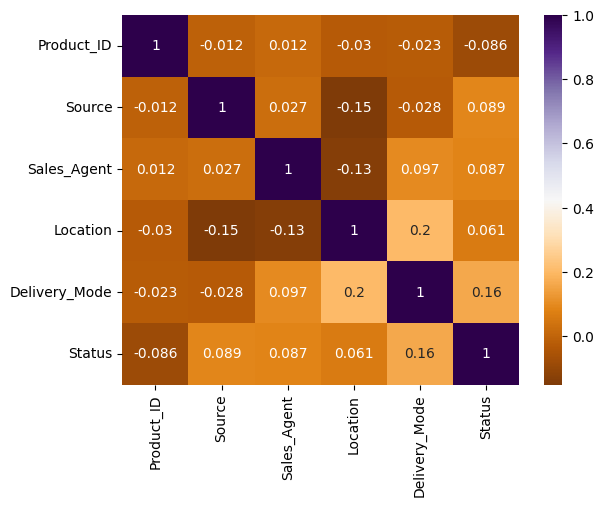

In [62]:
sns.heatmap(data.corr(),annot=True,cmap='PuOr')
plt.show()

Saving the preprocessed dataset

In [63]:
data.to_csv('client_prepro.csv')

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
df=pd.read_csv('/content/gdrive/My Drive/capstone project/client_prepro.csv')

In [4]:
df.head()

,Unnamed: 0,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,0,18,4,10,16,4,0
1,1,18,4,1,16,4,0
2,2,18,4,1,16,4,0
3,3,18,4,1,16,4,0
4,4,18,4,1,16,4,0


In [5]:
df.tail()

,Unnamed: 0,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
7415,7417,9,5,3,11,1,1
7416,7418,15,5,4,16,4,1
7417,7419,5,6,10,15,3,1
7418,7420,21,2,11,16,3,1
7419,7421,25,4,7,14,3,0


In [6]:
x = df.drop(['Status'],axis=1)
y = df.Status

In [7]:
from sklearn.model_selection import train_test_split
X_train,x_test,Y_train,y_test=train_test_split(x, y,random_state=3)
print(X_train.shape)
print(x_test.shape)

(5565, 6)
(1855, 6)


* **Balancing the target column using SMOTE**

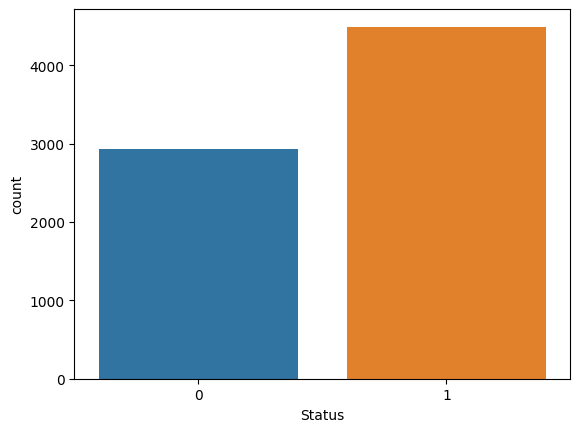

In [8]:
sns.countplot(x=df['Status'])
plt.show()

In [9]:
!pip install imblearn

In [10]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [11]:
# Smote is always applied on train data(X_train and Y_train)
x_train, y_train = smote.fit_resample(X_train,Y_train)

In [12]:
from collections import Counter
print("Actual Classes",Counter(Y_train))
print("SMOTE Classes",Counter(y_train))

Actual Classes Counter({1: 3385, 0: 2180})
SMOTE Classes Counter({0: 3385, 1: 3385})


# **Model creation and evaluation**

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

In [14]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,precision_score,recall_score,f1_score, roc_auc_score

In [32]:
#  function to train and test model
def train_test_model(model, model_name, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred,average='weighted')
    recall = recall_score(y_test, y_pred,average='weighted')
    f1 = f1_score(y_test, y_pred,average='weighted')
    cf=confusion_matrix(y_test,y_pred)

    model_eval = pd.DataFrame({'Accuracy': [accuracy],
                                'Precision': [precision],
                                'Recall': [recall],
                                'F1 Score': [f1],
                                 'confusion_matrix':[cf]},
                                   index=[model_name])

    return model_eval

* Finding K value for KNeighbors

In [16]:
error_rate=[]

for i in range(2,11):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    error_rate.append(np.mean(y_pred!=y_test))
error_rate

[0.45336927223719675,
 0.4183288409703504,
 0.4474393530997305,
 0.4269541778975741,
 0.4716981132075472,
 0.4350404312668464,
 0.47115902964959566,
 0.44150943396226416,
 0.46630727762803237]

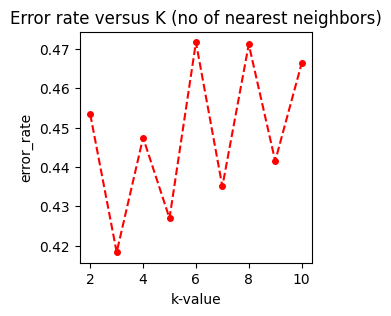

In [17]:
plt.figure(figsize=(3,3))
plt.plot(range(2,11),error_rate,color="red",linestyle="dashed",marker='o',markersize=4)
plt.title("Error rate versus K (no of nearest neighbors)")
plt.xlabel("k-value")
plt.ylabel("error_rate")
plt.show()

In [33]:
# create a dictionary of models
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(n_neighbors=3),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Xgboost': XGBClassifier(),
    'MLPclassifier':MLPClassifier( hidden_layer_sizes=(50,3),learning_rate_init=0.1,max_iter=100,random_state=2)
}

# train and test models
models_eval = pd.DataFrame()
for model_name, model in models.items():
    models_eval = models_eval.append(train_test_model(model, model_name, x_train, x_test, y_train, y_test))


In [34]:
models_eval

,Accuracy,Precision,Recall,F1 Score,confusion_matrix
Logistic Regression,0.611321,0.613123,0.611321,0.612145,"[[399, 350], [371, 735]]"
KNN,0.581671,0.586726,0.581671,0.583715,"[[388, 361], [415, 691]]"
SVM,0.555795,0.556178,0.555795,0.555984,"[[339, 410], [414, 692]]"
Naive Bayes,0.612938,0.617367,0.612938,0.614713,"[[415, 334], [384, 722]]"
Decision Tree,0.649057,0.651206,0.649057,0.649995,"[[437, 312], [339, 767]]"
Random Forest,0.677089,0.678025,0.677089,0.677524,"[[456, 293], [306, 800]]"
Gradient Boosting,0.707278,0.709602,0.707278,0.708216,"[[494, 255], [288, 818]]"
Xgboost,0.698652,0.697844,0.698652,0.698214,"[[463, 286], [273, 833]]"
MLPclassifier,0.403774,0.163033,0.403774,0.232278,"[[749, 0], [1106, 0]]"


# **Hyperparameter tuning**

Doing hyperparameter tuning in Decision tree, Random forest,gradient boost,xgboost

In [105]:
from sklearn.model_selection import RandomizedSearchCV

-->Decision tree

In [106]:
# Hyper parameter tuning
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90]
            }

In [116]:
modeldt = DecisionTreeClassifier()#model

rf_dt = RandomizedSearchCV(estimator=modeldt, scoring='accuracy',param_distributions=parameters, n_iter=100, cv=3,
                               verbose=2, random_state=42, n_jobs=-1)
rf_dt.fit(x_train, y_train)
rf_best_params = rf_dt.best_params_
print(f"Best paramters: {rf_best_params})")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'splitter': 'best', 'min_weight_fraction_leaf': 0.2, 'min_samples_leaf': 10, 'max_leaf_nodes': 60, 'max_depth': 12})


-->Random forest Classifier

In [108]:
n_estimators = [int(x) for x in np.linspace(start=200, stop=1000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

In [109]:
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

regr1 = RandomForestClassifier(random_state=42)#model

rf_cv = RandomizedSearchCV(estimator=regr1, scoring='accuracy',param_distributions=random_grid, n_iter=100, cv=3,
                               verbose=2, random_state=42, n_jobs=-1)
rf_cv.fit(x_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 822, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 80, 'bootstrap': True})


-->Gradient boosting

In [110]:
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
                "loss":( 'exponential', 'deviance', 'log_loss' )}

regr1 = GradientBoostingClassifier(random_state=42)#model

rf_cv = RandomizedSearchCV(estimator=regr1, scoring='accuracy',param_distributions=random_grid, n_iter=100, cv=3,
                               verbose=2, random_state=42, n_jobs=-1)
rf_cv.fit(x_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 911, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 100, 'loss': 'deviance'})


-->XG Boost

In [115]:
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
               'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
               'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}


regr1 = XGBClassifier(random_state=42)#model

rf_cv = RandomizedSearchCV(estimator=regr1, scoring='accuracy',param_distributions=random_grid, n_iter=100, cv=3,
                               verbose=2, random_state=42, n_jobs=-1)
rf_cv.fit(x_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'reg_lambda': 6.4, 'reg_alpha': 0.4, 'n_estimators': 733, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 70, 'gamma': 0.2})


In [25]:
# create a dictionary of models
models = {
    'Decision Tree': DecisionTreeClassifier(splitter= 'best', min_weight_fraction_leaf= 0.1, min_samples_leaf= 7,max_leaf_nodes=60,max_depth= 7),
    'Random Forest': RandomForestClassifier(n_estimators= 822, min_samples_split=2, min_samples_leaf=4, max_features='sqrt', max_depth=80, bootstrap= True),
    'Gradient boost':GradientBoostingClassifier(n_estimators= 911, min_samples_split=5,min_samples_leaf= 4,max_features='auto', max_depth=100, loss='deviance'),
     'xgb':XGBClassifier(reg_lambda= 6.4,reg_alpha= 0.4, n_estimators=733, min_samples_split= 10,min_samples_leaf= 1, max_features='auto', max_depth=70, gamma= 0.2)

}

# train and test models
models_eval_tuned = pd.DataFrame()
for model_name, model in models.items():
    models_eval_tuned = models_eval_tuned.append(train_test_model(model, model_name, x_train, x_test, y_train, y_test))


In [24]:
models_eval_tuned

,Accuracy,Precision,Recall,F1 Score,confusion_matrix
Decision Tree,0.652830,0.668655,0.652830,0.656039,"[[506, 243], [401, 705]]"
Random Forest,0.706739,0.706995,0.706739,0.706863,"[[479, 270], [274, 832]]"
Gradient boost,0.676550,0.674624,0.676550,0.675409,"[[434, 315], [285, 821]]"
xgb,0.692183,0.691603,0.692183,0.691877,"[[459, 290], [281, 825]]"


In [35]:
models_eval

,Accuracy,Precision,Recall,F1 Score,confusion_matrix
Logistic Regression,0.611321,0.613123,0.611321,0.612145,"[[399, 350], [371, 735]]"
KNN,0.581671,0.586726,0.581671,0.583715,"[[388, 361], [415, 691]]"
SVM,0.555795,0.556178,0.555795,0.555984,"[[339, 410], [414, 692]]"
Naive Bayes,0.612938,0.617367,0.612938,0.614713,"[[415, 334], [384, 722]]"
Decision Tree,0.649057,0.651206,0.649057,0.649995,"[[437, 312], [339, 767]]"
Random Forest,0.677089,0.678025,0.677089,0.677524,"[[456, 293], [306, 800]]"
Gradient Boosting,0.707278,0.709602,0.707278,0.708216,"[[494, 255], [288, 818]]"
Xgboost,0.698652,0.697844,0.698652,0.698214,"[[463, 286], [273, 833]]"
MLPclassifier,0.403774,0.163033,0.403774,0.232278,"[[749, 0], [1106, 0]]"


## **Conclusion**

models Random forest, gradient boosting, xgboost gives best results among others.Randomforest perfomance increased after tuning the hyper parameters.There is no significant differnce in xgboost but in gradient boosting the performance is decreased after tuning. Lets check the roc_score

* Roc_acu_score for the models

In [36]:
#--> RandomForestClassifier
rf= RandomForestClassifier(n_estimators= 822, min_samples_split=2, min_samples_leaf=4, max_features='sqrt', max_depth=80, bootstrap= True)
rf.fit(x_train, y_train)
y_pred_rf=rf.predict(x_test)

In [85]:
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       0.63      0.64      0.63       749
           1       0.75      0.75      0.75      1106

    accuracy                           0.70      1855
   macro avg       0.69      0.69      0.69      1855
weighted avg       0.70      0.70      0.70      1855



In [46]:
pred_prob = rf.predict_proba(x_test)
roc_auc_score(y_test, pred_prob[:,1])

0.7721603488195231

In [47]:
#-->GradientBoostingClassifier(hyperparameter tuned)
gb_tuned=GradientBoostingClassifier(n_estimators= 911, min_samples_split=5,min_samples_leaf= 4,max_features='auto', max_depth=100, loss='deviance')
gb_tuned.fit(x_train, y_train)
y_pred_gb_tuned=gb_tuned.predict(x_test)

In [84]:
print(classification_report(y_test, y_pred_gb_tuned))

              precision    recall  f1-score   support

           0       0.60      0.58      0.59       749
           1       0.72      0.74      0.73      1106

    accuracy                           0.68      1855
   macro avg       0.66      0.66      0.66      1855
weighted avg       0.68      0.68      0.68      1855



In [83]:
pred_prob = gb_tuned.predict_proba(x_test)
roc_auc_score(y_test, pred_prob[:,1])

0.7350874100971276

In [52]:
#-->GradientBoostingClassifier

gb=GradientBoostingClassifier(random_state=42)
gb.fit(x_train, y_train)
y_pred_gb=gb.predict(x_test)

In [53]:
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.63      0.66      0.65       749
           1       0.76      0.74      0.75      1106

    accuracy                           0.71      1855
   macro avg       0.70      0.70      0.70      1855
weighted avg       0.71      0.71      0.71      1855



In [54]:
pred_prob = gb.predict_proba(x_test)
roc_auc_score(y_test, pred_prob[:,1])

0.7768422996786553

In [58]:
#-->XGBClassifier(hyperparameter tuned)

xg_tuned=XGBClassifier(reg_lambda= 6.4,reg_alpha= 0.4, n_estimators=733, min_samples_split= 10,min_samples_leaf= 1, max_features='auto', max_depth=70, gamma= 0.2)
xg_tuned.fit(x_train, y_train)
y_pred_xg_tuned=xg_tuned.predict(x_test)

In [59]:
print(classification_report(y_test, y_pred_xg_tuned))

              precision    recall  f1-score   support

           0       0.62      0.61      0.62       749
           1       0.74      0.75      0.74      1106

    accuracy                           0.69      1855
   macro avg       0.68      0.68      0.68      1855
weighted avg       0.69      0.69      0.69      1855



In [60]:
pred_prob = xg_tuned.predict_proba(x_test)
roc_auc_score(y_test, pred_prob[:,1])

0.7680409322134153

In [55]:
#-->XGBClassifier
xg= XGBClassifier()
xg.fit(x_train, y_train)
y_pred_xg=xg.predict(x_test)

In [56]:
print(classification_report(y_test, y_pred_xg))

              precision    recall  f1-score   support

           0       0.63      0.62      0.62       749
           1       0.74      0.75      0.75      1106

    accuracy                           0.70      1855
   macro avg       0.69      0.69      0.69      1855
weighted avg       0.70      0.70      0.70      1855



In [57]:
pred_prob = xg.predict_proba(x_test)
roc_auc_score(y_test, pred_prob[:,1])

0.765248179006608

Best performed model is graident boosting classifier without tuning

Prediction v/s true value

In [61]:
y_test

array([0, 1, 1, ..., 0, 1, 0])

In [68]:
true_y=pd.DataFrame(y_test)
true_y.columns=['Status']
true_y

,Status
0,0
1,1
2,1
3,0
4,0
...,...
1850,1
1851,1
1852,0
1853,1


In [69]:
prediction=pd.DataFrame({'y_true':true_y['Status'],'gradient_boosting':y_pred_gb,'random_forest':y_pred_rf,'xg_boost':y_pred_xg,'xgb_tuned':y_pred_xg_tuned,'gradient_boosting_tuned':y_pred_gb_tuned})
prediction

,y_true,gradient_boosting,random_forest,xg_boost,xgb_tuned,gradient_boosting_tuned
0,0,1,0,0,0,1
1,1,1,1,0,1,1
2,1,1,1,1,1,0
3,0,0,0,0,0,0
4,0,0,1,1,1,1
...,...,...,...,...,...,...
1850,1,1,1,1,1,1
1851,1,1,1,1,1,1
1852,0,1,0,1,1,0
1853,1,1,1,1,1,1


# **Report**

* Finding right modules to connect colab and database are needed some searching
* More time is taken for understanding domain and the business keywords
* Label encoder and frequency encoded methods are used to convert the categorical data
* Before doing categorical convertion;Features which contains lots of differnt labels are handling by replacing or merging
* Functions are used for modeling;using function it's look more neat and easy understand
* Hyperparameter tunning is done using randomized searchcv
